Relatório do Projeto Final de Introdução à Ciência dos Dados

# Introdução

O eterno embate entre popularidade e qualidade de um produto midiático sempre foi um tópico de interesse daqueles que o consomem. Todos gostariam que aquele produto que tanto admiram seja considerado de qualidade, afinal ninguém gosta de ouvir que uma obra adorada é ruim. Porém, muitas obras independem da opinião de um especialista para ganharem o coração do público. Os Video Games não fogem dessa situação. Enquanto jogos avaliados por críticos especialistas como obras primas costumam fazer sucesso, existem também os que são considerados medíocres e mesmo assim vendem milhões pelo mundo.

Para analisar melhor essa relação, encontramos uma base de dados sobre Video Games que venderam pelo menos 100 000 cópias de 1980 a 2016, gerada a partir do site [VGChartz](http://www.vgchartz.com/). Além de incluir os nomes dos jogos, a base de dados apresenta a plataforma para que o jogo foi lançado, o ano em que foi lançado, o gênero do jogo, a empresa que o publicou, o desenvolvedor, a classificação indicativa e por fim, as vendas separadas por região, além das vendas globais e as avaliações de críticos e usuários que jogaram o jogo, além de sua quantidade.

A partir desses dados pretendemos analisar, principalmente, a relação entre as avaliações dos críticos e as vendas dos jogos, mas também as relações entre gênero e classificação indicativa e entre o desenvolvedor e o número de jogadores.

# Vendas de Videogames com Avaliações

Maior número de vendas implica em maior qualidade?

Qual a relação entre gênero e classificação indicativa?

O desenvolvedor do jogo influencia na quantidade de jogadores?

In [44]:
import pandas as pd

df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


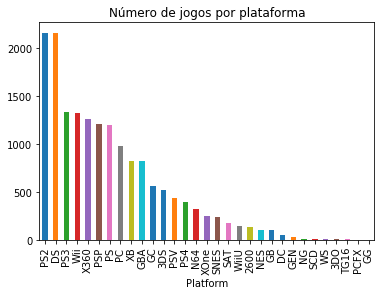

In [45]:
import matplotlib.pyplot as plt

df1 = df.copy()
df1 = df1.groupby(['Platform']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
plt.title('Número de jogos por plataforma')
df1.plot.bar()

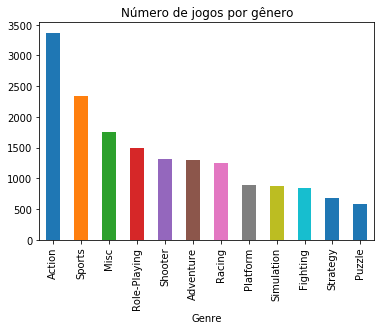

In [46]:
df1 = df.copy()
df1 = df1.groupby(['Genre']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
plt.title('Número de jogos por gênero')
df1.plot.bar()

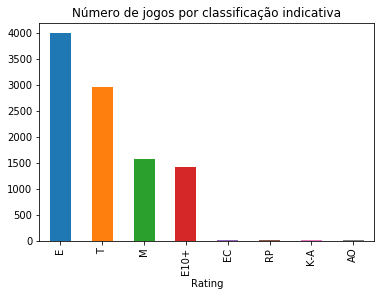

In [47]:
df1 = df.copy()
df1 = df1.groupby(['Rating']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
plt.title('Número de jogos por classificação indicativa')
df1.plot.bar()

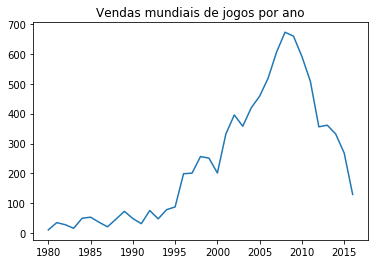

In [57]:
df1 = df.copy()
d = ['Year_of_Release', 'Global_Sales']
df1 = df1[d]
df1 = df1.groupby('Year_of_Release').sum()
df1 = df1.drop([2017.0, 2020.0])
plt.title('Vendas mundiais de jogos por ano')
plt.plot(df1)

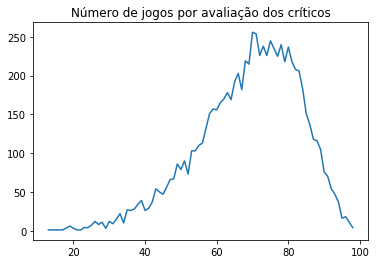

In [66]:
df1 = df.copy()
df1 = df1.groupby(['Critic_Score']).count()
df1 = df1['Name']
df1
plt.title('Número de jogos por avaliação dos críticos')
plt.plot(df1)